# Loan Eligibility Prediction

### import require packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

# 1. Load the Dataset

In [2]:
df = pd.read_csv("Loan_default.csv")

# 2. Perform Exploratory Data Analysis or Data preprocessing

In [3]:
df.shape

(255347, 18)

In [4]:
df.head()

LoanID   Age   Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96  56.0  85994.0     50587.0          520              80   
1  HPSK72WA7R  69.0  50432.0    124440.0          458              15   
2  C1OZ6DPJ8Y  46.0  84208.0    129188.0          451              26   
3  V2KKSFM3UN  32.0  31713.0     44799.0          743               0   
4  EY08JDHTZP  60.0  20437.0      9139.0          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4         NaN        0

## 1. Missing Values

In [5]:
df.isnull().sum()

LoanID             0
Age               21
Income            51
LoanAmount         1
CreditScore        0
MonthsEmployed     0
NumCreditLines     0
InterestRate       0
LoanTerm           0
DTIRatio           1
Education         14
EmploymentType     0
MaritalStatus     26
HasMortgage       15
HasDependents     25
LoanPurpose       34
HasCoSigner       12
Default            0
dtype: int64

In [6]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Age 0.0001  % missing values
Income 0.0002  % missing values
Education 0.0001  % missing values
MaritalStatus 0.0001  % missing values
HasMortgage 0.0001  % missing values
HasDependents 0.0001  % missing values
LoanPurpose 0.0001  % missing values
HasCoSigner 0.0  % missing values


In [7]:
# Fill value by mean mode 

df['Income'].fillna(df['Income'].mean(), inplace=True)

df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Education'].fillna(df['Education'].mode()[0],inplace=True)
df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0],inplace=True)
df['HasMortgage'].fillna(df['HasMortgage'].mode()[0],inplace=True)
df['HasDependents'].fillna(df['HasDependents'].mode()[0],inplace=True) 
df['HasDependents'].fillna(df['HasDependents'].mode()[0],inplace=True)                        

df.dropna(axis=0, inplace=True)

In [8]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

## 2. Numerical Variables

In [9]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  10


Age   Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0  56.0  85994.0     50587.0          520              80               4   
1  69.0  50432.0    124440.0          458              15               1   
2  46.0  84208.0    129188.0          451              26               3   
3  32.0  31713.0     44799.0          743               0               3   
5  25.0  90298.0     90448.0          720              18               2   

   InterestRate  LoanTerm  DTIRatio  Default  
0         15.23        36      0.44        0  
1          4.81        60      0.68        0  
2         21.17        24      0.31        1  
3          7.07        24      0.23        0  
5         22.72        24      0.10        1

In [10]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


### Discrete variable

In [11]:
discrete_feature


['NumCreditLines', 'LoanTerm', 'Default']

In [12]:
df[discrete_feature].head()


NumCreditLines  LoanTerm  Default
0               4        36        0
1               1        60        0
2               3        24        1
3               3        24        0
5               2        24        1

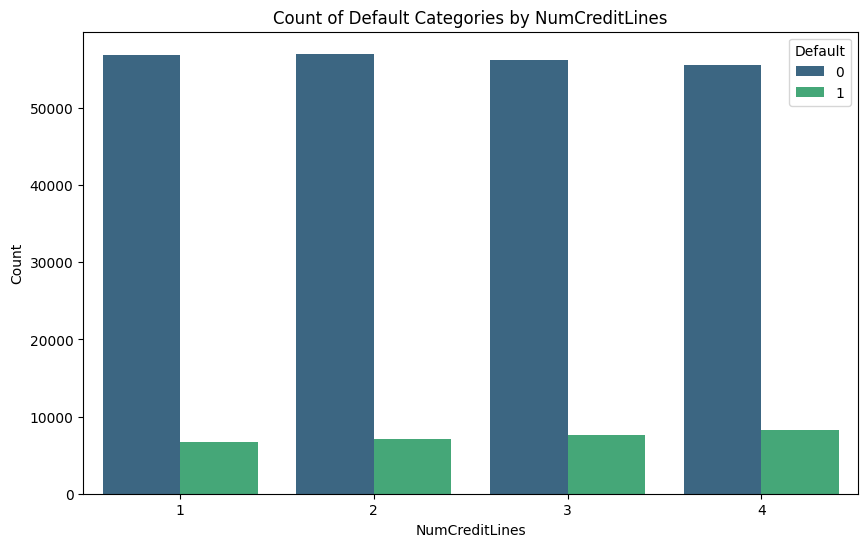

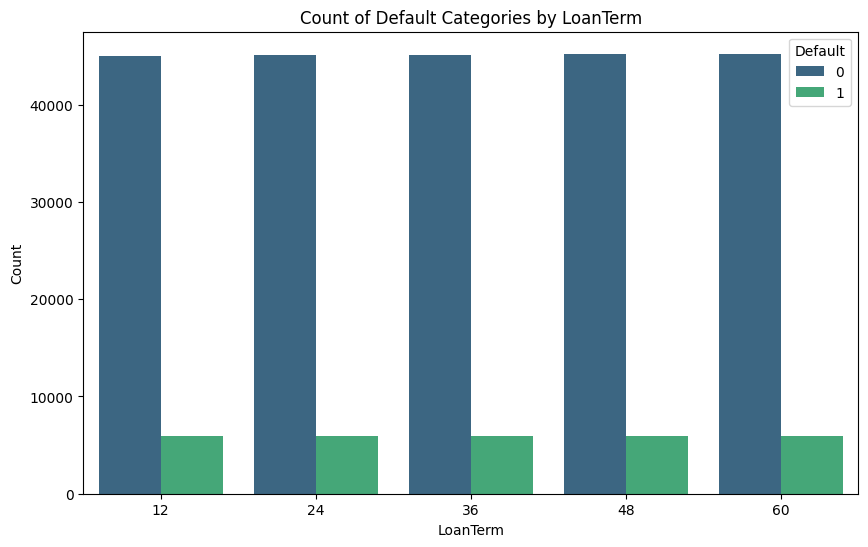

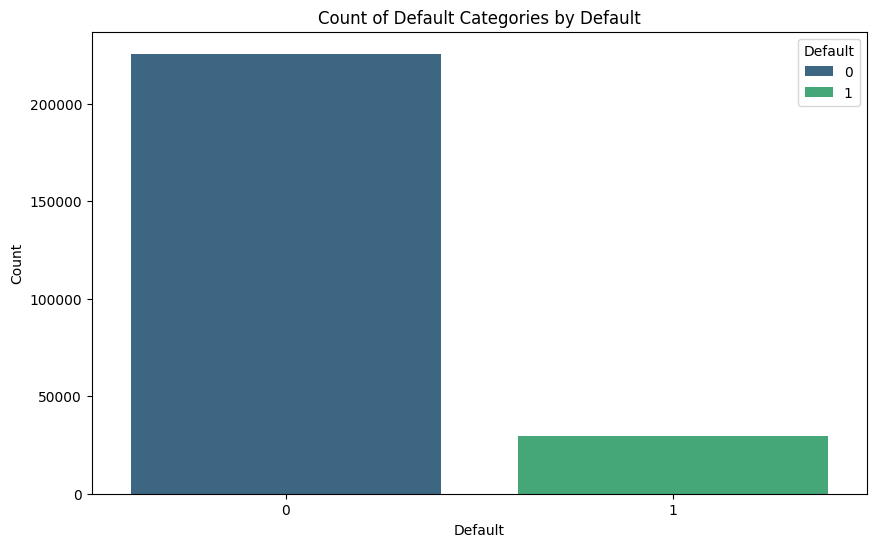

In [13]:
## Lets Find the realtionship between them and Loan eligibility

for feature in discrete_feature:
    data = df.copy()
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Default', data=data, palette='viridis')
    
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count of Default Categories by {feature}')
    plt.legend(title='Default', loc='upper right')
    plt.show()

### Continuous Variable

In [14]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


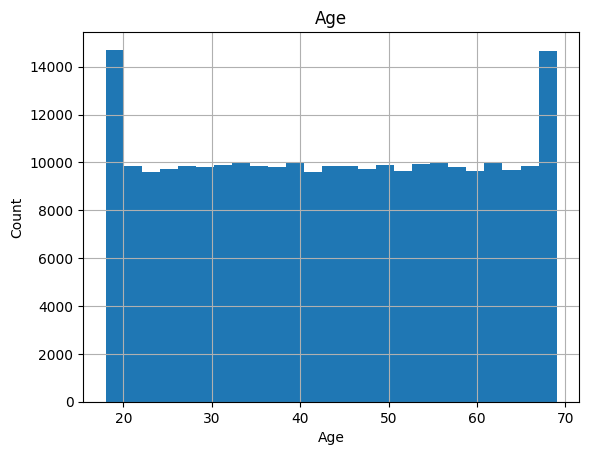

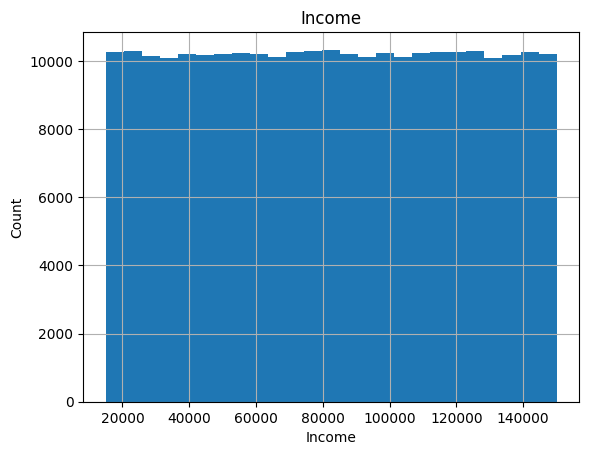

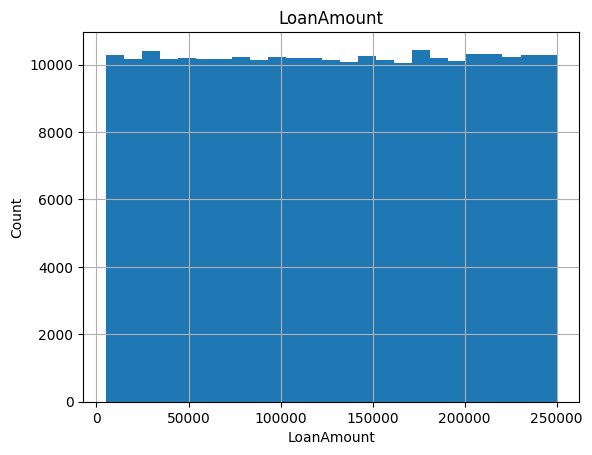

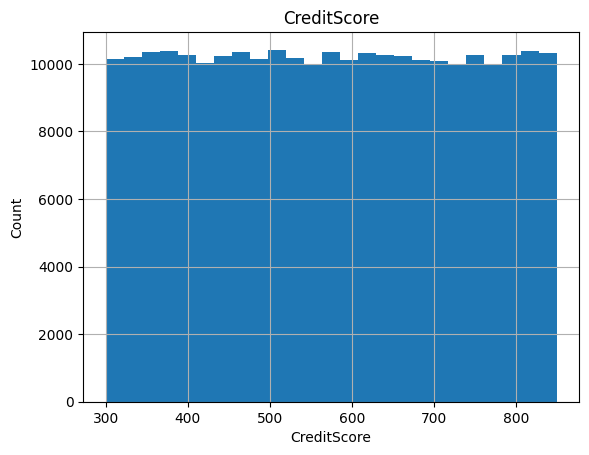

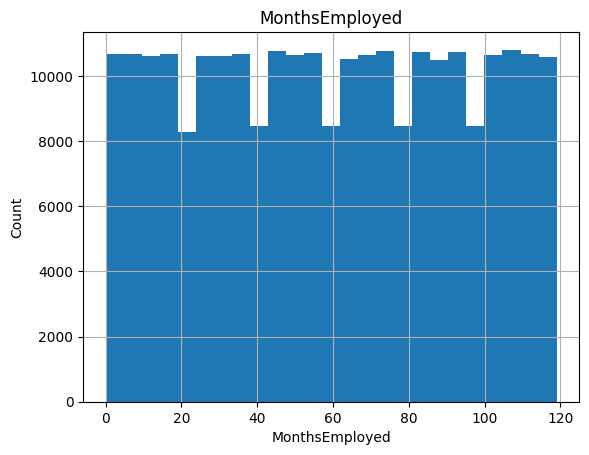

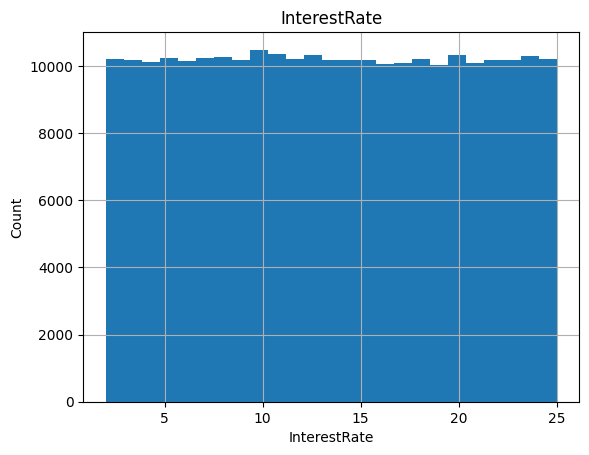

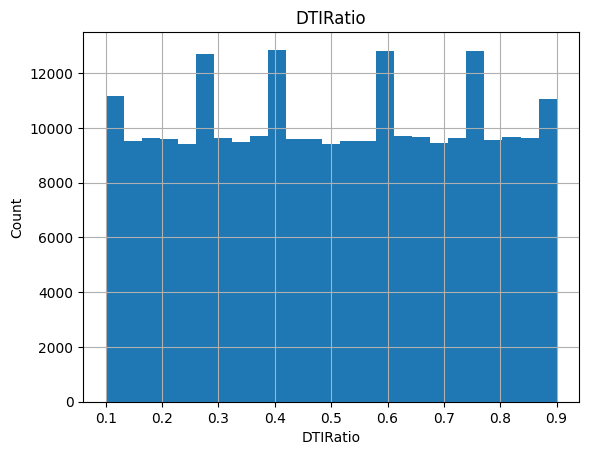

In [15]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

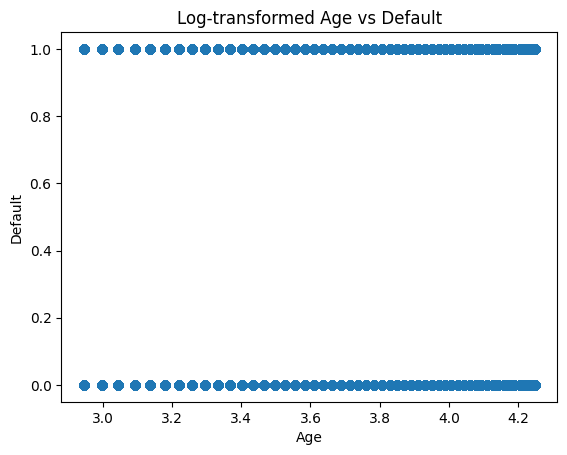

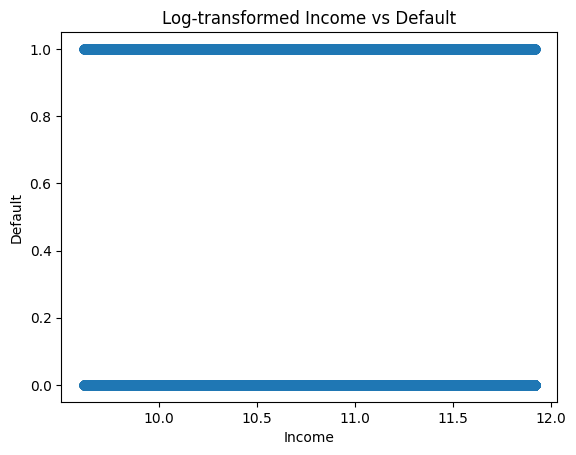

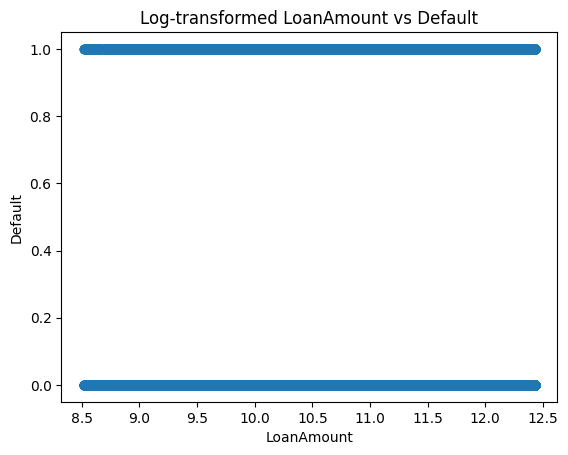

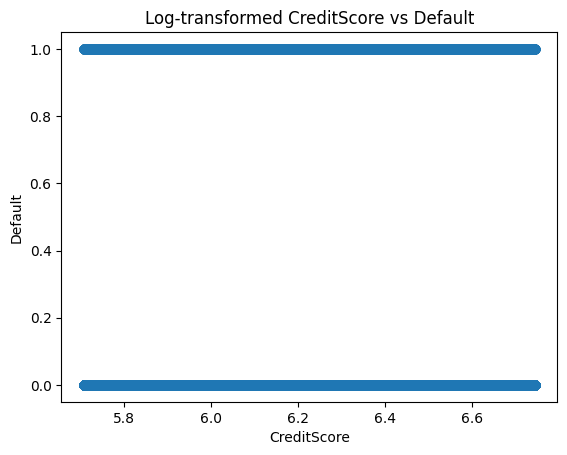

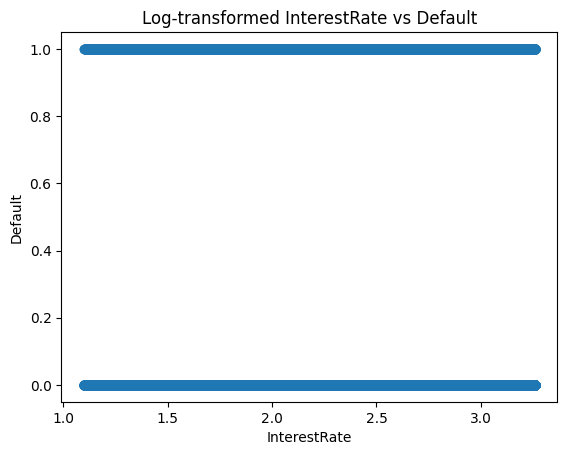

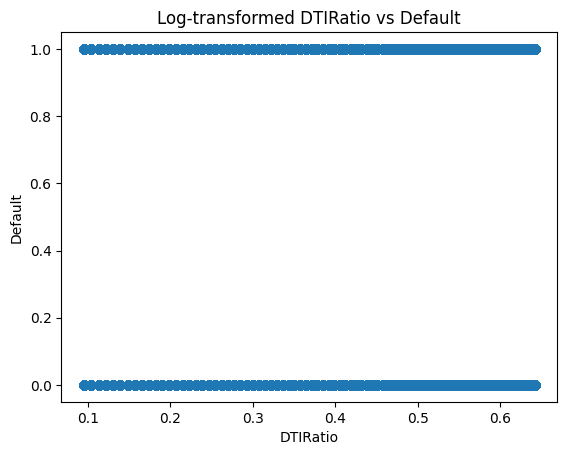

In [16]:
for feature in continuous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log1p(data[feature])  # Use log1p to handle zero values
        plt.scatter(data[feature], data['Default'])
        plt.xlabel(feature)
        plt.ylabel('Default')
        plt.title(f'Log-transformed {feature} vs Default')
        plt.show()

## 3.Outliers

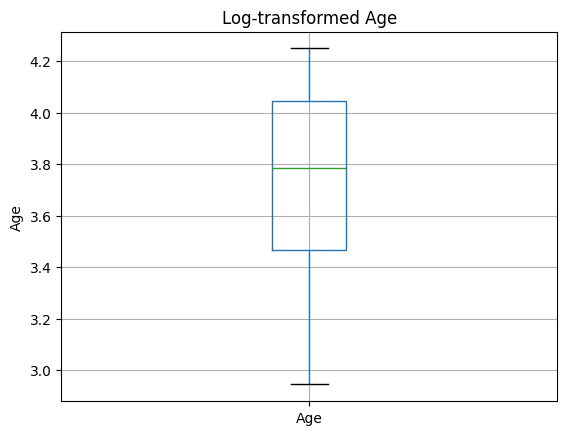

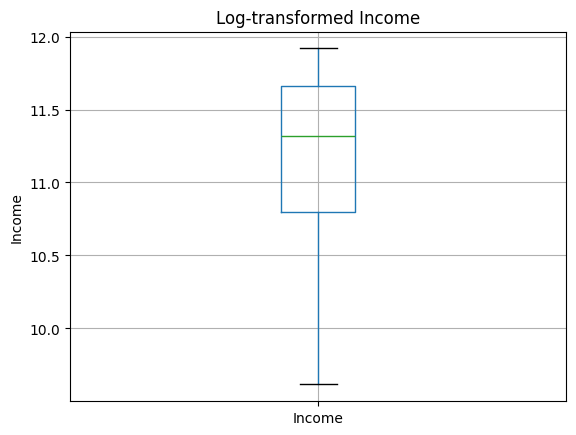

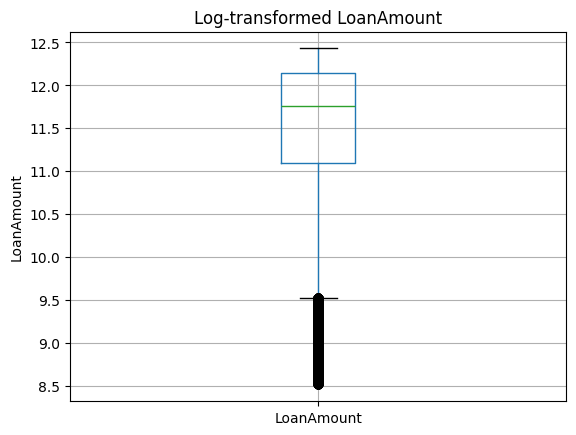

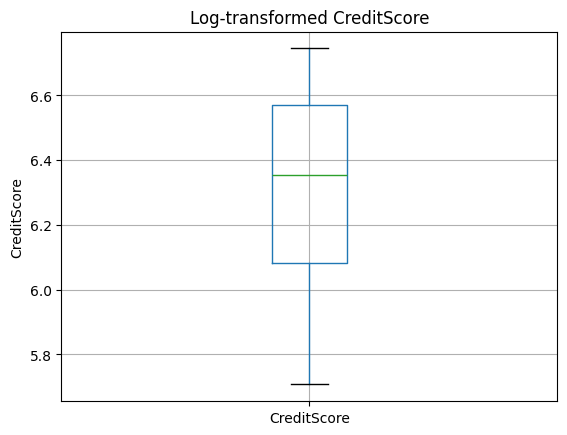

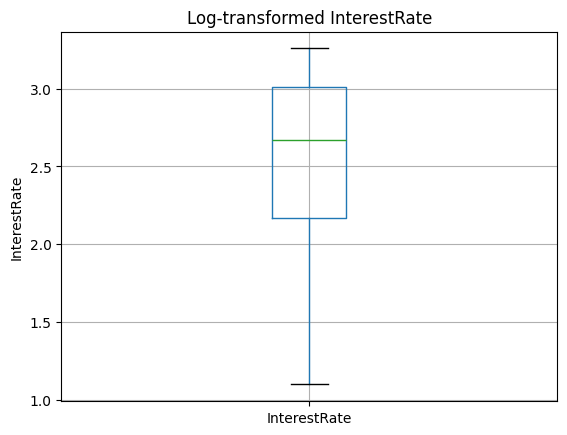

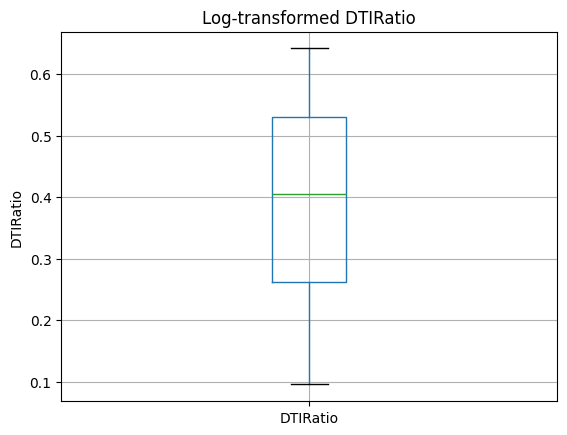

In [17]:
# Plot boxplots for log-transformed features
for feature in continuous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log1p(data[feature])  # Use log1p to handle zero values
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(f'Log-transformed {feature}')
        plt.show()

### Categorical Variables


In [18]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']

if 'LoanID' in categorical_features:
    categorical_features.remove('LoanID')

categorical_features
categorical_features

['Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

In [19]:
df[categorical_features].head()


Education EmploymentType MaritalStatus HasMortgage HasDependents  \
0   Bachelor's      Full-time      Divorced         Yes           Yes   
1     Master's      Full-time       Married          No            No   
2     Master's     Unemployed      Divorced         Yes           Yes   
3  High School      Full-time       Married          No            No   
5  High School     Unemployed       Married         Yes            No   

  LoanPurpose HasCoSigner  
0       Other         Yes  
1       Other         Yes  
2        Auto          No  
3    Business          No  
5    Business         Yes

In [20]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Education and number of categories are 4
The feature is EmploymentType and number of categories are 4
The feature is MaritalStatus and number of categories are 3
The feature is HasMortgage and number of categories are 2
The feature is HasDependents and number of categories are 2
The feature is LoanPurpose and number of categories are 5
The feature is HasCoSigner and number of categories are 2


### Find out the relationship between categorical variable and dependent feature Default


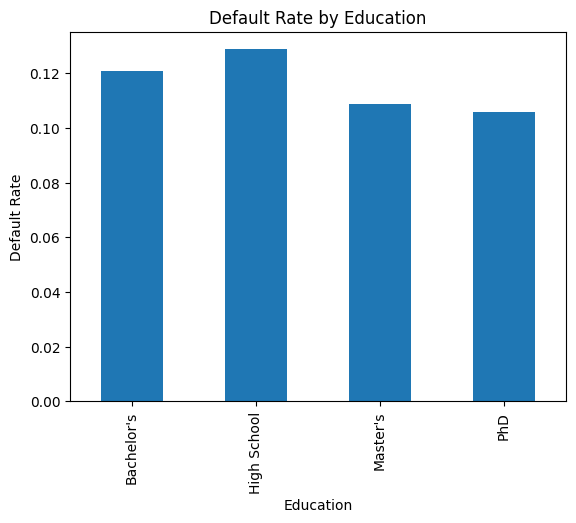

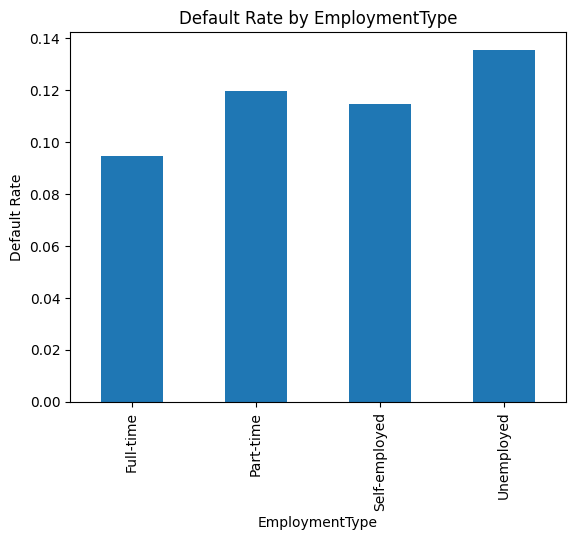

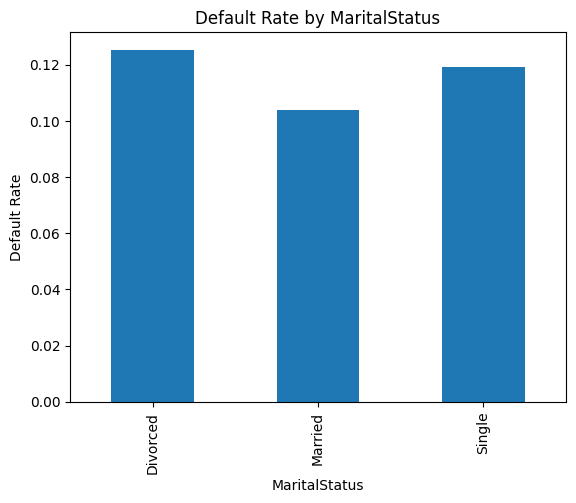

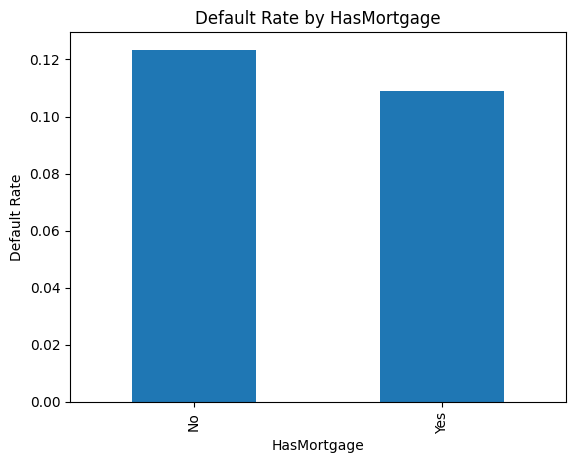

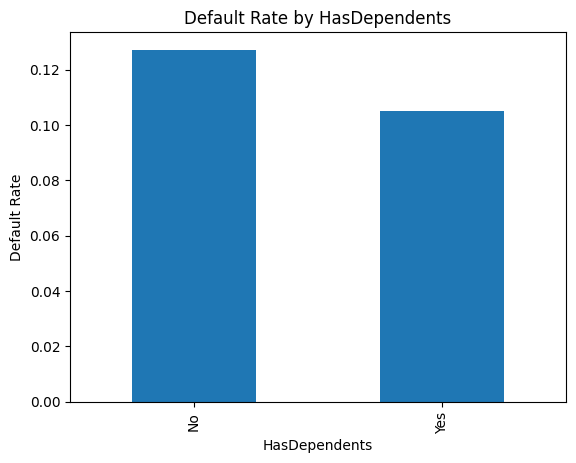

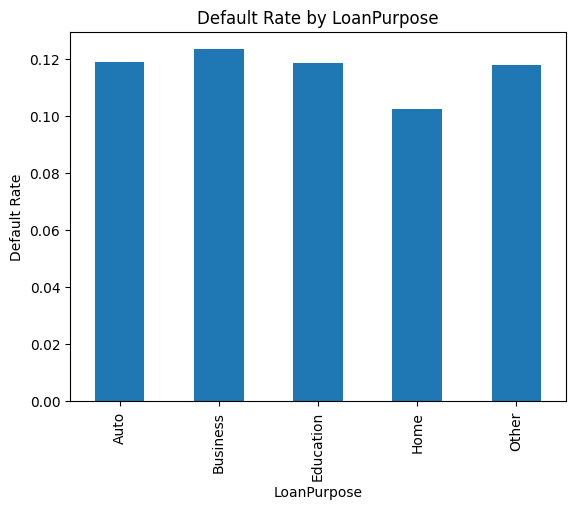

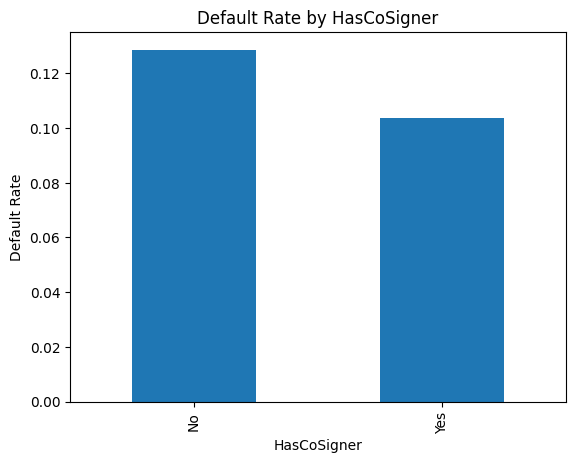

In [21]:
# Plot default rate (mean of 'Default') for each categorical feature
for feature in categorical_features:
    data = df.copy()
    default_rate = data.groupby(feature)['Default'].mean()
    default_rate.plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Default Rate')
    plt.title(f'Default Rate by {feature}')
    plt.show()

## 4. Label encoding

In [22]:
# convort the categorical into numerical 
from sklearn.preprocessing import LabelEncoder

df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['EmploymentType'] = LabelEncoder().fit_transform(df['EmploymentType'])
df['MaritalStatus'] = LabelEncoder().fit_transform(df['MaritalStatus'])
df['HasMortgage'] = LabelEncoder().fit_transform(df['HasMortgage'])
df['HasDependents'] = LabelEncoder().fit_transform(df['HasDependents'])
df['LoanPurpose'] = LabelEncoder().fit_transform(df['LoanPurpose'])
df['HasCoSigner'] = LabelEncoder().fit_transform(df['HasCoSigner'])

## 5. Deal with imbalanced Data (SMOTE)

In [23]:
# pip install imbalanced-Learn

class_0_count, class_1_count = df['Default'].value_counts()

# separate  the class 1, 0 into 2 df
df_class_0 = df[df['Default']==0]
df_class_1 = df[df['Default']==1]

print(df_class_0['Default'].value_counts())
print(df_class_1['Default'].value_counts())

0    225650
Name: Default, dtype: int64
1    29649
Name: Default, dtype: int64


In [24]:
## class 0 ==> 60000
#  class 1 ==> 29649
# merge together

df_class_0 = df_class_0.sample(60000)

df2 = pd.concat([df_class_1, df_class_0],axis= 0)
df2.value_counts()

LoanID      Age   Income    LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  HasCoSigner  Default
000ELHLBPV  37.0  81658.0   152598.0    792          23              4               14.06         24        0.86      3          2               1              1            0              0            0            1          1
O3SQDSH04B  25.0  84628.0   205795.0    577          26              4               21.02         60        0.64      2          2               2              0            0              4            0            1          1
O3XQ17UFP8  33.0  111961.0  95237.0     751          43              2               18.74         60        0.27      0          3               0              0            0              2            1            0          1
O3X995MNVQ  40.0  20690.0   228870.0    595          89              4               24.68   

In [25]:
x = df2.drop(['LoanID','Default','MaritalStatus','LoanPurpose','Education'],axis = 'columns')
y = df2['Default']
print(y.value_counts())
x.value_counts

0    60000
1    29649
Name: Default, dtype: int64


<bound method DataFrame.value_counts of          Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
2       46.0   84208.0    129188.0          451              26   
5       25.0   90298.0     90448.0          720              18   
8       36.0   42053.0     92357.0          827              83   
11      28.0  149227.0    139759.0          375              56   
18      19.0   40718.0     78515.0          319             119   
...      ...       ...         ...          ...             ...   
115093  30.0  138261.0    115784.0          526              36   
117035  49.0   71646.0    121776.0          454              76   
144083  57.0  124110.0    145451.0          416               1   
145752  24.0   61415.0    147863.0          664              12   
188155  21.0  134635.0     48169.0          557             114   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  EmploymentType  \
2                    3         21.17        24      0.31               3   
5  

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= 'minority')
x_sm, y_sm = smote.fit_resample(x,y)
y_sm.value_counts()


1    60000
0    60000
Name: Default, dtype: int64

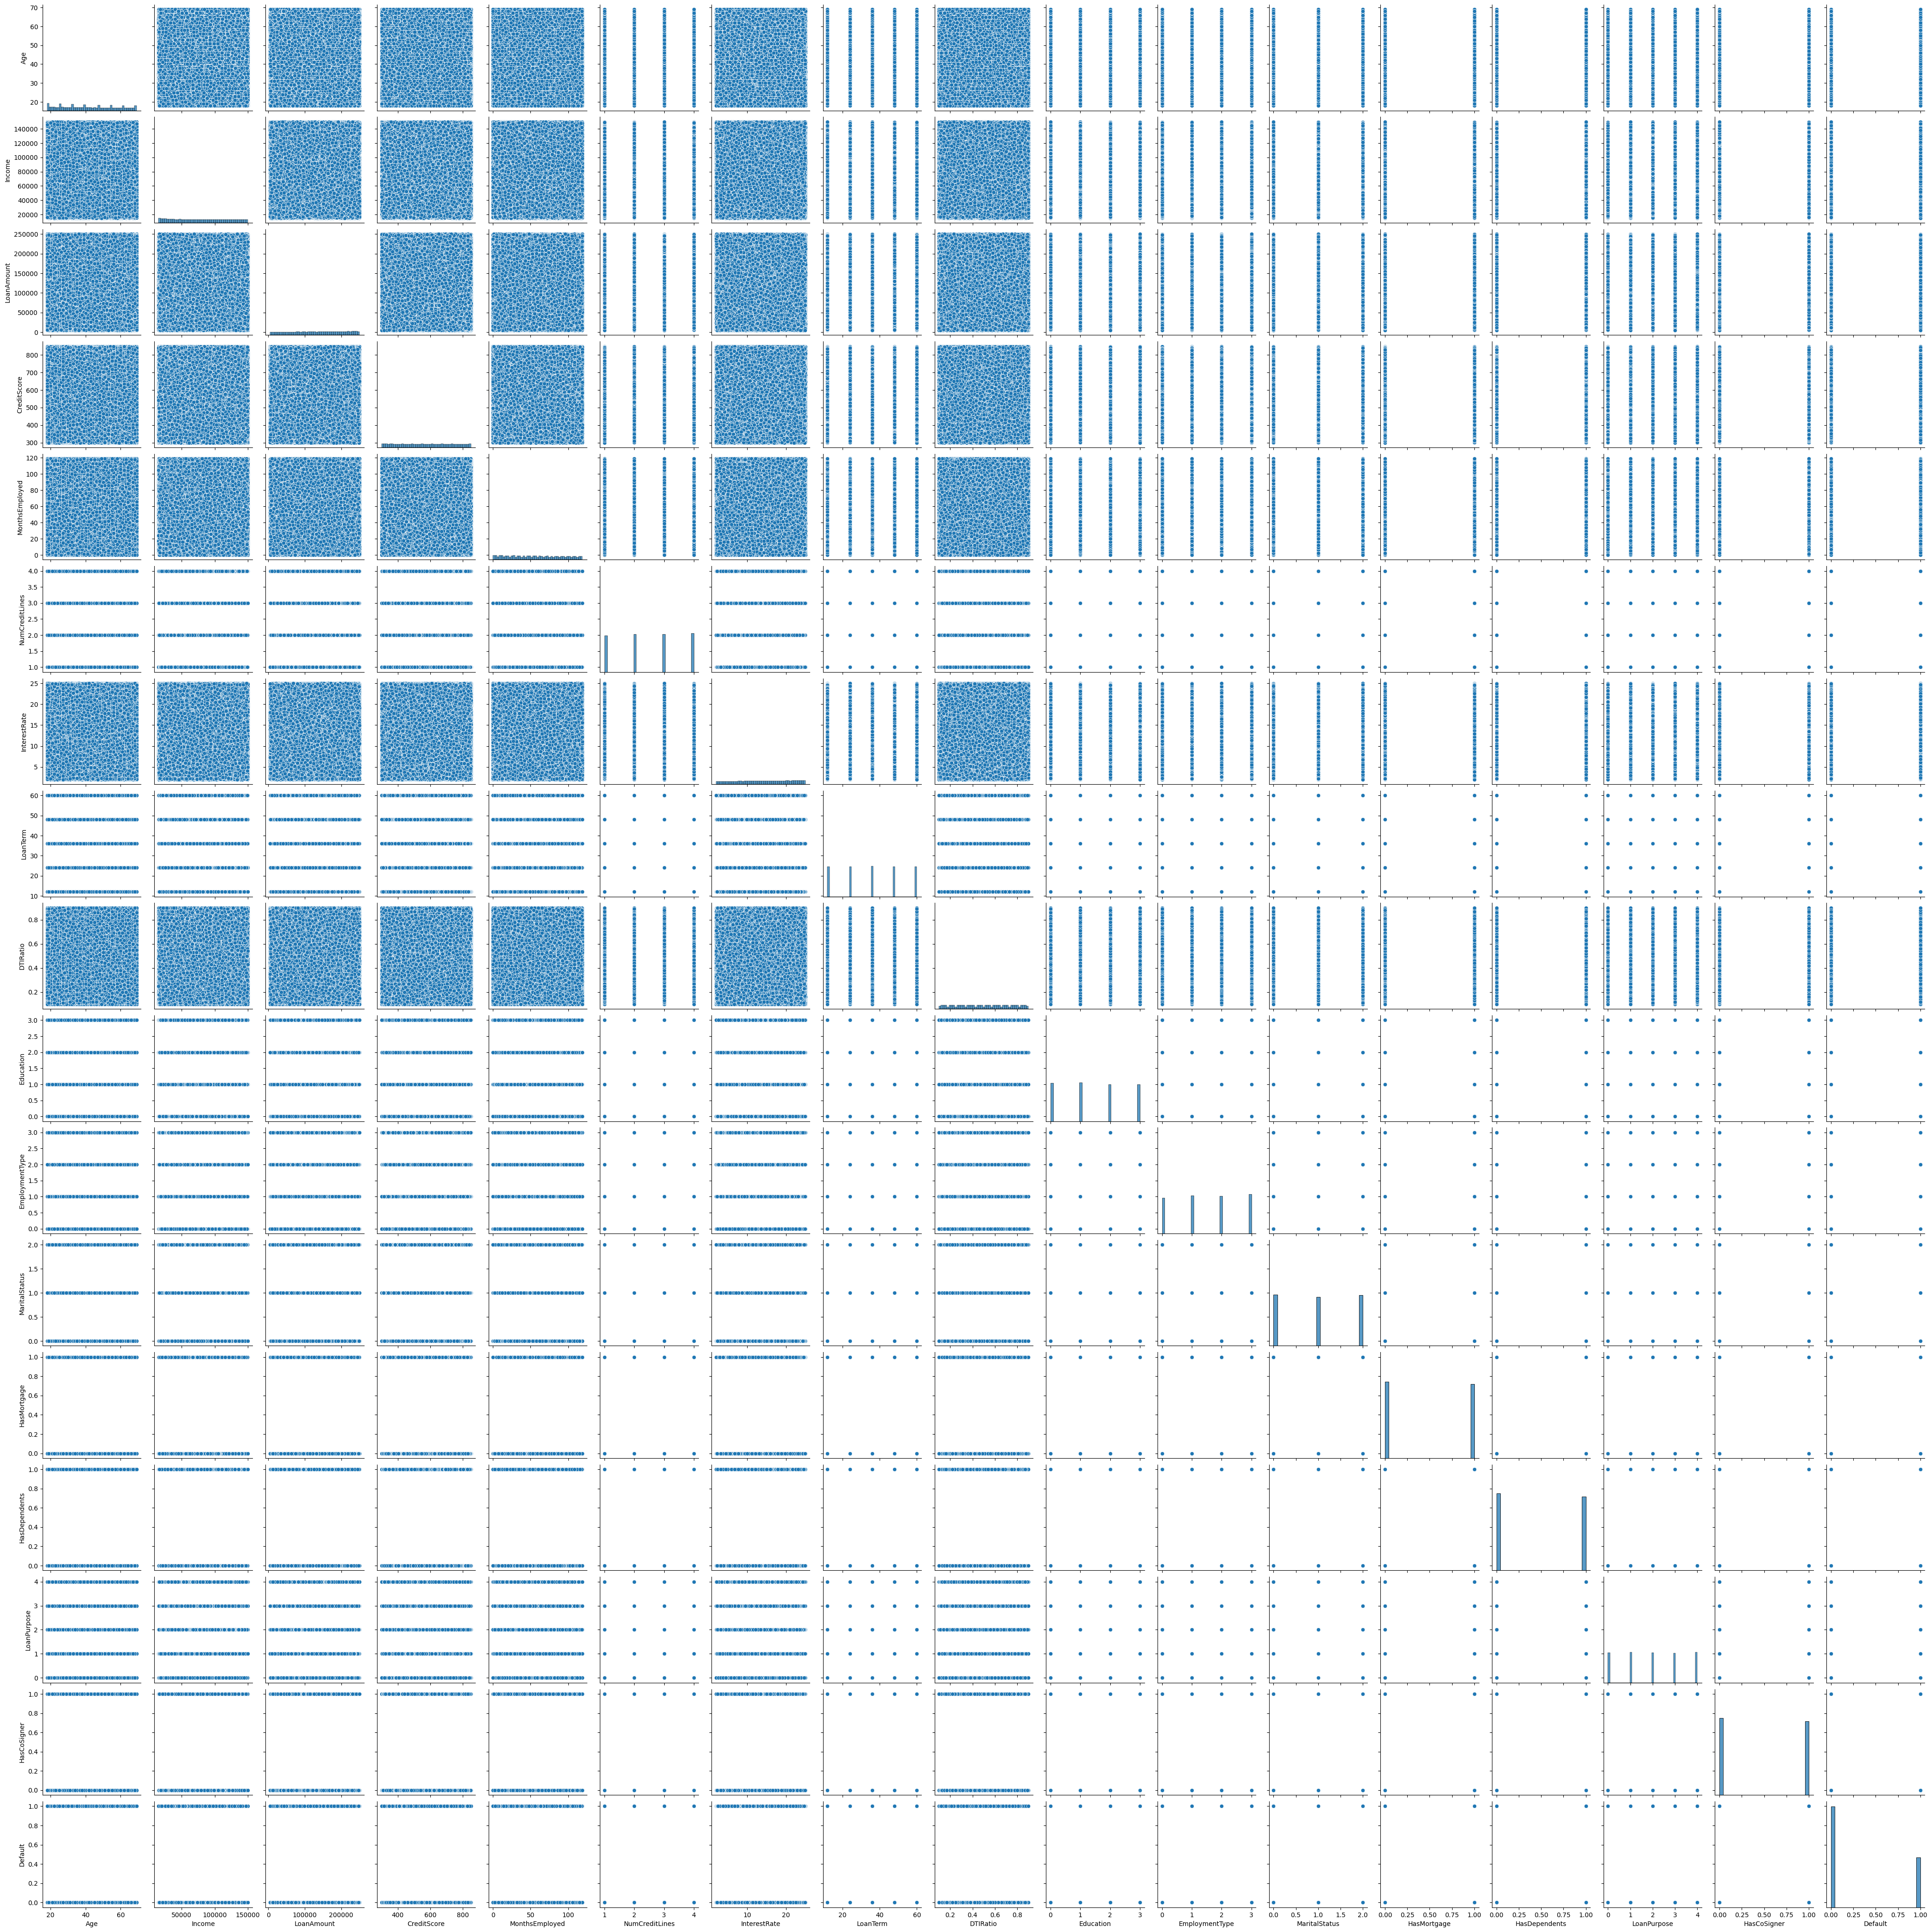

In [27]:
# sns.pairplot(df2)

# 2. Feature Selection

### Scaling the data

In [31]:
from sklearn.preprocessing import MinMaxScaler

x = pd.DataFrame(MinMaxScaler().fit_transform(x_sm),columns=['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate','LoanTerm', 'DTIRatio', 
       'EmploymentType', 'HasMortgage', 'HasDependents','HasCoSigner'])
x.head()

Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0  0.549020  0.512648    0.506904     0.275046        0.218487   
1  0.137255  0.557761    0.348777     0.765027        0.151261   
2  0.352941  0.200382    0.356569     0.959927        0.697479   
3  0.196078  0.994281    0.550052     0.136612        0.470588   
4  0.019608  0.190493    0.300070     0.034608        1.000000   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  EmploymentType  \
0        0.666667      0.833478      0.25    0.2625        1.000000   
1        0.333333      0.900870      0.25    0.0000        1.000000   
2        0.000000      0.953913      0.75    0.1250        0.666667   
3        0.666667      0.166957      0.50    0.8750        0.000000   
4        0.333333      0.521739      0.25    0.0875        0.666667   

   HasMortgage  HasDependents  HasCoSigner  
0          1.0            1.0          0.0  
1          1.0            0.0          1.0  
2          1.0            0.0          0.0  
3          0.0            0.0          1.0  
4          1.0            0.0          0.0

## Split the data into training and testing dataset

In [32]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(x_sm, y_sm, train_size= 0.8, random_state=783437, stratify=y_sm)

# 3. Model Building

In [33]:
# Built the catboost model
from catboost import CatBoostClassifier
model_catboost = CatBoostClassifier().fit(X_train,Y_train)
model_catboost


Learning rate set to 0.072338
0:	learn: 0.6768330	total: 78.2ms	remaining: 1m 18s
1:	learn: 0.6629157	total: 89.7ms	remaining: 44.7s
2:	learn: 0.6510162	total: 103ms	remaining: 34.2s
3:	learn: 0.6405409	total: 129ms	remaining: 32s
4:	learn: 0.6313578	total: 147ms	remaining: 29.3s
5:	learn: 0.6230375	total: 159ms	remaining: 26.3s
6:	learn: 0.6157854	total: 177ms	remaining: 25.1s
7:	learn: 0.6092751	total: 199ms	remaining: 24.7s
8:	learn: 0.6035840	total: 212ms	remaining: 23.3s
9:	learn: 0.5984132	total: 227ms	remaining: 22.5s
10:	learn: 0.5938379	total: 279ms	remaining: 25.1s
11:	learn: 0.5895664	total: 325ms	remaining: 26.7s
12:	learn: 0.5858853	total: 338ms	remaining: 25.7s
13:	learn: 0.5677201	total: 355ms	remaining: 25s
14:	learn: 0.5648320	total: 373ms	remaining: 24.5s
15:	learn: 0.5619502	total: 390ms	remaining: 24s
16:	learn: 0.5597464	total: 428ms	remaining: 24.8s
17:	learn: 0.5420216	total: 443ms	remaining: 24.2s
18:	learn: 0.5368260	total: 461ms	remaining: 23.8s
19:	learn: 0.5

## Model Evaluation code

In [34]:
from sklearn.metrics import classification_report
        
print(classification_report(y_test, model_catboost.predict(x_test)))


              precision    recall  f1-score   support

           0       0.75      0.86      0.80     12000
           1       0.84      0.72      0.77     12000

    accuracy                           0.79     24000
   macro avg       0.80      0.79      0.79     24000
weighted avg       0.80      0.79      0.79     24000



## save the model

In [35]:
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(model_catboost, file)